# Trying out a few linear models

## Importing the important libraries

In [1]:
import pandas as pd #Pandas is used for providing a DataFrame data structure to handle the data
import numpy as np #Numerical Linear Algebra Library
import matplotlib # Popular Library on Visualization
import seaborn as sns # Library based on Matplotlib for better visualizations
import matplotlib.pyplot as plt 
from scipy.stats import skew # Scipy is the scientific Computing library, here used for statistics
from scipy.stats.stats import pearsonr 

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [5]:
print(train.shape)
print(test.shape)
print(all_data.shape)

(1460, 81)
(1459, 80)
(2919, 79)


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Some Data Preprocessing

<li> First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
<li>Create Dummy variables for the categorical features
<li>Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53754b9588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f53757a04a8>]], dtype=object)

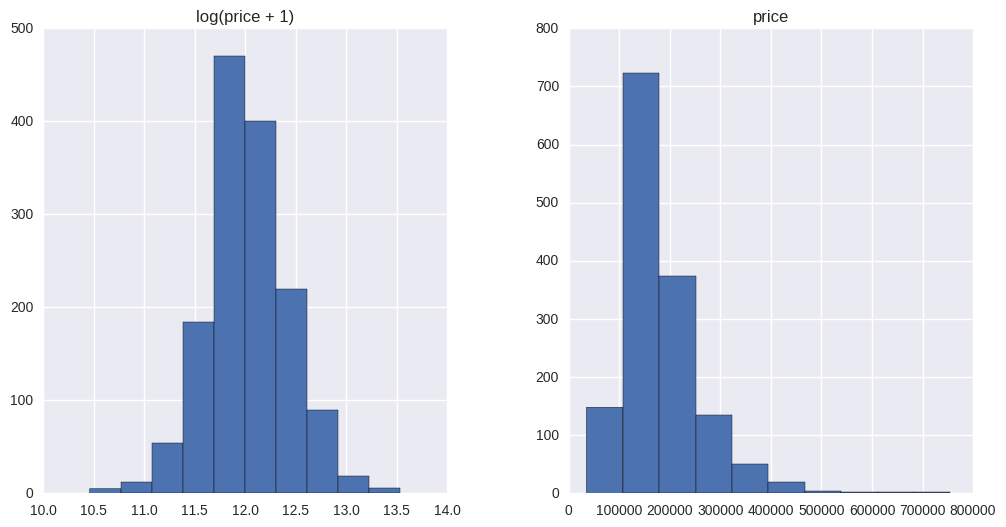

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train['SalePrice'])})
prices.hist()

In [8]:
#log transform the target:
train["logSalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [9]:
all_data = pd.get_dummies(all_data)

In [10]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [11]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [12]:
train.shape #because of the addition of the log sale price, the number of features increased

(1460, 82)

In [13]:
corr = train.select_dtypes(include = ['float64', 'int64']).corr() #To get the correlations, like in the previous notebook
corr['logSalePrice'].sort_values(ascending = False) #Sorting the Correlations

logSalePrice     1.000000
SalePrice        0.948374
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorc

# 1) Try to perform linear regression with the previously recieved data

### The most important feature was found out to be 'OverallQual'

In [14]:
from sklearn import linear_model as lm #Importing library for linear models from sklearn

In [15]:
from sklearn import model_selection as ms

In [16]:
linear_regression = lm.LinearRegression()

In [17]:
feature_of_interest = ['OverallQual']
y = train['logSalePrice']
x = train[feature_of_interest]

In [18]:
x.shape

(1460, 1)

In [19]:
lr1 = linear_regression.fit(x,y)

In [20]:
lr1.coef_[0]

0.23602647540671148

In [21]:
lr1.intercept_

10.584457556906923

## The regression line obtained is :

### SalePrice = 10.584457556906923 + 0.23602647540671148(OverallQual)

In [22]:
RS = (train['logSalePrice'] - lr1.predict(train[['OverallQual']]))**2
RSS = np.sum(RS)
RSS # The Residual Sum of Squares of the data 

77.3375405055613

## But the Residual Sum of Squares is too High, let's try to improve this

# 2) Trying to take more features into account (Multiple Regression)
    
### Using the features : 'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF', 'FullBath','TotRmsAbvGrd'

In [23]:
features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath'] #Based on the Correlations obtained (Selecting the top 5)
label = 'logSalePrice'

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train = train[features]
y_train = train[label]

In [26]:
mult_regr = lm.LinearRegression()

In [27]:
mult_regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
mult_regr.coef_

array([ 0.13176615,  0.00017316,  0.00034369,  0.0001353 ,  0.05607412])

In [29]:
mult_regr.intercept_

10.564558616380856

In [30]:
RS = (mult_regr.predict(X_train)-train['logSalePrice'])**2
RSS = np.sum(RS)
RSS # The Residual Sum of Squares of the data 

49.07949126590034

# There is improvement by taking more parameters, but is still very high:

### Let's try some feature selection

# 3) Using Ridge Regression (Penalising Weights(Coefficients))

Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [37]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
train["SalePrice"] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [38]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [39]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [40]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [41]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

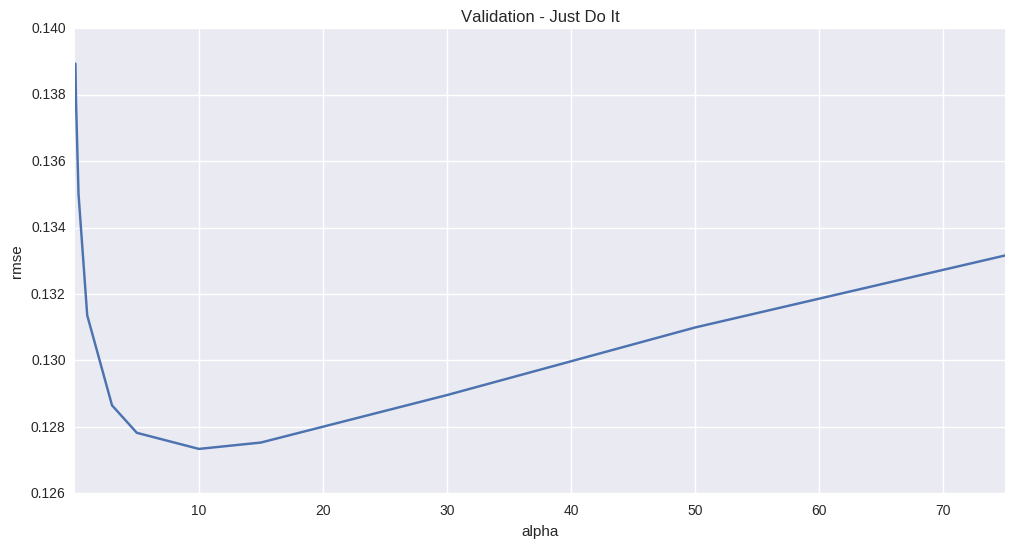

In [42]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha",)
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too small the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha large) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [43]:
cv_ridge.min()

0.1273373466867076

So for the Ridge regression we get a rmsle of about 0.127

# Let' try out the Lasso model (Feature Selection)

### We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. 

In [44]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [45]:
rmse_cv(model_lasso).mean()

0.12314421090977454

The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. 

#### Let's take a look at the coefficients:

In [46]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [48]:
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 177 variables


In [49]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

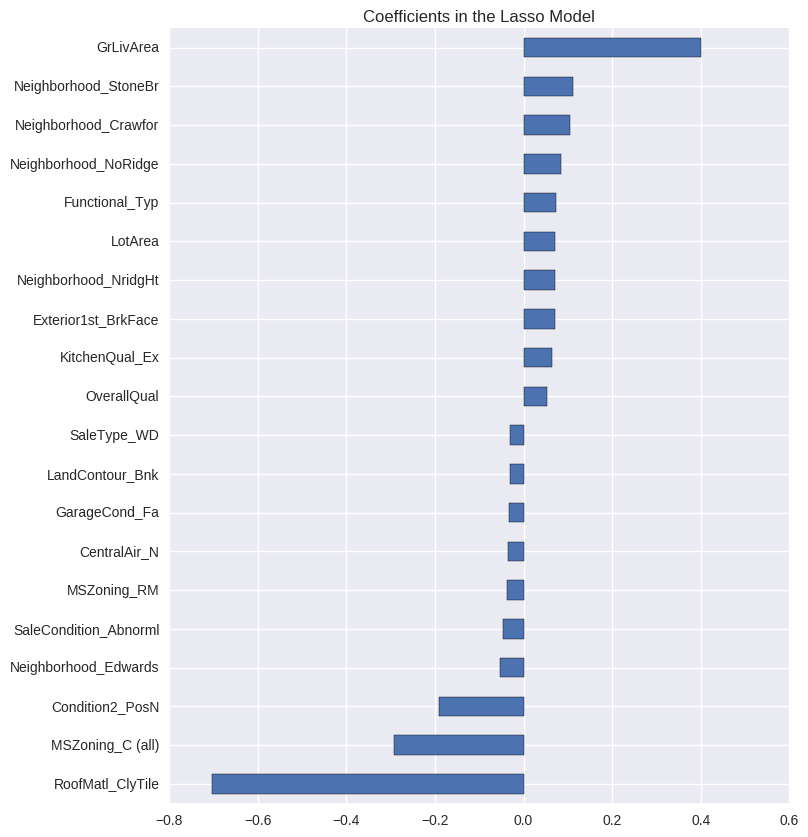

In [50]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

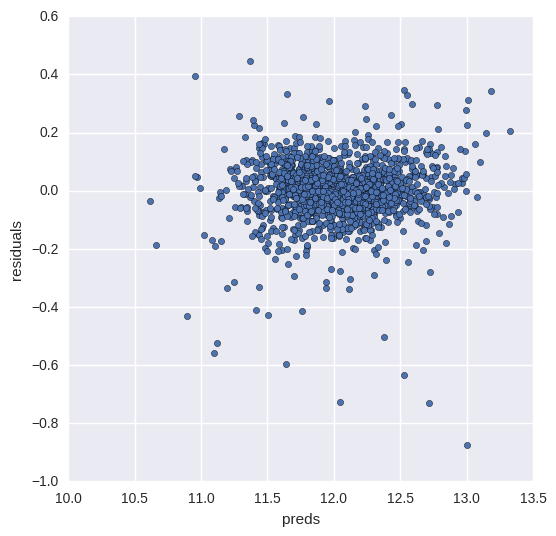

In [51]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

#### The residual plot looks pretty good